<a href="https://colab.research.google.com/github/AndrewRucker/Fantasy-Football-and-Betting/blob/main/Initial%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Parlay betting model
#See read me for documentation https://github.com/AndrewRucker/ParlayCorrelation/blob/main/README.md
#Initial data exploration, just uploaded first csv of prop data from week 1 of 2021, lets see what we can do (09/15)


In [2]:
import pandas as pd
import seaborn as sns
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

In [27]:
#Read in CSV to dataframe
url = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/ParlayData.csv'

df = pd.read_csv(url)

df

,Game,OVER_UNDER,SPREAD,FAV_HOME,OVER,UNDER,FAV_COVER,UND_COVER,FAV_QB_YDS,FAV_QB_YDS_LINE,FAV_QB_COM,FAV_QB_COM_LINE,UND_QB_YDS,UND_QB_YDS_LINE,UND_QB_COM,UND_QB_COM_LINE,FAV_RB_ATT,FAV_RB_ATT_LINE,FAV_RB_YDS,FAV_RB_YDS_LINE,UND_RB_ATT,UND_RB_ATT_LINE,UND_RB_YDS,UND_RB_YDS,FAV_WR1_REC,FAV_WR1_REC_LINE,FAV_WR1_YDS,FAV_WR1_YDS_LINE,UND_WR1_REC,UND_WR1_REC_LINE,UND_WR1_YDS,UND_WR1_YDS_LINE,FAV_WR2_REC,FAV_WR2_REC_LINE,FAV_WR2_YDS,FAV_WR2_YDS_LINE,UND_WR2_REC,UND_WR2_REC_LINE,UND_WR2_YDS,UND_WR2_YDS_LINE
0,BUF16_PIT23_W1_2021,48.5,6.5,1,0,1,0,1,0,284.5,1,24.5,0,266.5,0,25.5,1,8.5,1,32.5,1,14.5,0,58.5,1,7.5,0,89.5,1,5.5,1,58.5,1,4.5,1,50.5,0,4.5,0,49.5
1,CAR19_NYJ14_W1_2021,44.5,4.5,1,0,1,1,0,1,250.5,1,22.5,1,232.5,0,20.5,1,18.5,1,73.5,0,7.5,0,27.5,1,4.5,1,59.5,1,4.5,1,54.5,0,4.5,1,51.5,1,3.5,0,37.5
2,ATL6_PHI32_W1_2021,47.5,3.5,1,0,1,0,1,0,295.5,0,24.5,1,245.5,1,20.5,1,12.5,1,45.5,0,15.5,1,64.5,0,5.5,0,89.5,1,3.5,1,43.5,0,4.5,0,46.5,1,3.5,1,42.5
3,KAN33_CLE29_W1_2021,52.5,6.5,1,1,0,0,1,1,312.5,1,26.5,1,262.5,0,22.5,1,11.5,0,48.5,1,13.5,1,71.5,1,6.5,1,88.5,0,5.5,1,57.5,0,7.5,0,82.5,1,5.5,1,57.5
4,GNB3_NOR38_W1_2021,50.5,4.5,0,0,1,0,1,0,272.5,0,24.5,0,252.5,0,21.5,0,14.5,0,60.5,0,14.5,0,61.5,0,7.5,0,88.5,0,5.5,0,46.5,0,3.5,0,37.5,0,3.5,0,45.5
5,NWE16_MIA17_W1_2021,44.5,2.5,1,0,1,0,1,0,232.5,0,19.5,0,234.5,0,21.5,1,14.5,1,68.5,0,10.5,1,43.5,1,3.5,0,49.5,0,3.5,1,46.5,1,2.5,1,27.5,0,3.5,0,36.5
6,DEN27_NYG13_W1_2021,42.5,2.5,0,0,1,1,0,1,247.5,1,22.5,1,221.5,1,18.5,1,12.5,1,47.5,0,14.5,0,61.5,1,3.5,1,48.5,1,4.5,1,49.5,1,4.5,1,50.5,1,3.5,1,41.5
7,MIN24_CIN27_W1_2021,47.5,3.5,0,1,0,0,1,1,256.5,1,21.5,0,261.5,0,23.5,1,21.5,0,97.5,1,15.5,1,65.5,1,4.5,1,58.5,1,4.5,1,59.5,0,5.5,0,75.5,1,3.5,1,47.5
8,SEA28_IND16_W1_2021,48.5,2.5,0,0,1,1,0,0,268.5,0,24.5,1,243.5,1,21.5,1,14.5,1,57.5,1,15.5,0,67.5,0,5.5,0,74.5,0,4.5,0,48.5,0,5.5,1,67.5,0,3.5,1,40.5
9,SFR41_DET33_W1_2021,45.5,7.5,0,1,0,1,0,1,225.5,0,20.5,1,222.5,1,20.5,1,15.5,1,64.5,1,10.5,0,43.5,1,4.5,1,46.5,1,4.5,1,45.5,0,5.5,1,67.5,0,4.5,1,37.5


In [20]:
df.columns

Index(['Pair', 'Qty'], dtype='object')

(24.5, -0.5)

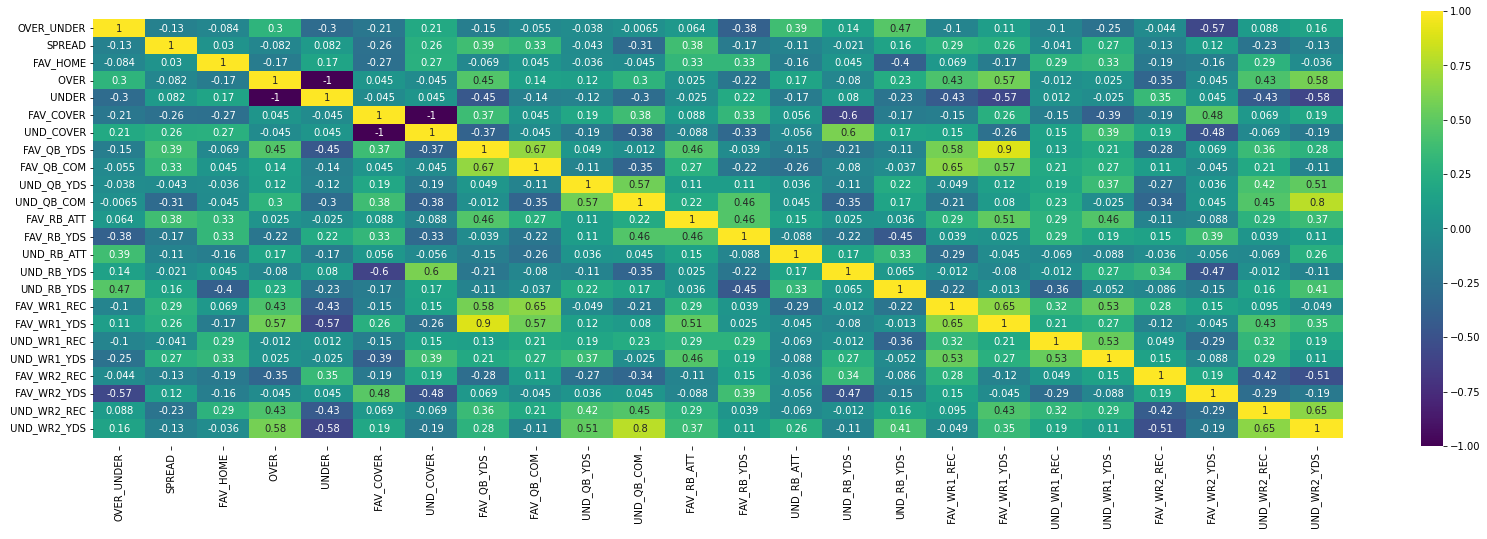

In [11]:
#Correlation matrix to see correlation factors between prop bets, spread, over/unders

corrmat = df[['OVER_UNDER', 'SPREAD', 'FAV_HOME', ' OVER', ' UNDER', ' FAV_COVER',
       ' UND_COVER', 'FAV_QB_YDS',' FAV_QB_COM', ' UND_QB_YDS', ' UND_QB_COM', ' FAV_RB_ATT',' FAV_RB_YDS', ' UND_RB_ATT',' UND_RB_YDS',
       'UND_RB_YDS', ' FAV_WR1_REC', ' FAV_WR1_YDS', ' UND_WR1_REC', ' UND_WR1_YDS', ' FAV_WR2_REC', ' FAV_WR2_YDS', ' UND_WR2_REC', ' UND_WR2_YDS']].corr()

f, ax = plt.subplots(figsize = (28,8))
matrix = sns.heatmap(corrmat,vmax=1, vmin =-1, annot=True, center = 0,
            cmap = 'viridis');
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)


*Offseason project has to be getting more data here. Found an edge with a few combinations, and was profitable. Need to make it more robust with a dataset of hundreds of games.*


--------------------------------------------------------------------------------

Correlation between props is great. But what happens when say FAV_QB1 YDS hits, sure we know that is about a 90% chance FAV_WR1_YDS is also hitting, but that 
may change the likelihood of another outcome such as UND_QB1_YDS hitting because those first two outcomes are decided now. So we should be looking at most common combinations of props being hit in the games, not just correlation between props.

In [61]:
df1 = df[[' OVER', ' UNDER', ' FAV_COVER', ' UND_COVER', 'FAV_QB_YDS',' FAV_QB_COM', ' UND_QB_YDS', ' UND_QB_COM', ' FAV_RB_ATT',' FAV_RB_YDS', ' UND_RB_ATT',' UND_RB_YDS', ' FAV_WR1_REC', ' FAV_WR1_YDS', ' UND_WR1_REC', ' UND_WR1_YDS', ' FAV_WR2_REC', ' FAV_WR2_YDS', ' UND_WR2_REC', ' UND_WR2_YDS']].copy()


In [62]:
df1

,OVER,UNDER,FAV_COVER,UND_COVER,FAV_QB_YDS,FAV_QB_COM,UND_QB_YDS,UND_QB_COM,FAV_RB_ATT,FAV_RB_YDS,UND_RB_ATT,UND_RB_YDS,FAV_WR1_REC,FAV_WR1_YDS,UND_WR1_REC,UND_WR1_YDS,FAV_WR2_REC,FAV_WR2_YDS,UND_WR2_REC,UND_WR2_YDS
0,0,1,0,1,0,1,0,0,1,1,1,0,1,0,1,1,1,1,0,0
1,0,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,0
2,0,1,0,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,1,1
3,1,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0
6,0,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1
7,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,1,1
8,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1
9,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1


Passing prop count. Let's see how often QB1+WR1 for both team hits on yardage props

In [72]:
pass1=df1[['FAV_QB_YDS', ' UND_QB_YDS', ' FAV_WR1_YDS', ' UND_WR1_YDS']].copy()
pass2=df1[['FAV_QB_YDS', ' UND_QB_YDS', ' FAV_WR1_YDS']].copy()

In [73]:
pass1.value_counts(ascending=False)

FAV_QB_YDS   UND_QB_YDS   FAV_WR1_YDS   UND_WR1_YDS
0           1            0             1               5
1           1            1             1               5
0           0            0             0               2
                                       1               2
            1            0             0               2
                         1             1               1
1           0            1             0               1
                                       1               1
dtype: int64

In [74]:
pass2.value_counts(ascending=False)

FAV_QB_YDS   UND_QB_YDS   FAV_WR1_YDS
0           1            0               7
1           1            1               5
0           0            0               4
1           0            1               2
0           1            1               1
dtype: int64

According to the data, FAV QB YDS (under) + FAV WR1 YDS (under) + UND QB YDS (OVER) + UND WR1 YDS (OVER) hit just under 20% of the time. 

Typically this parlay would get close to 10-1 odds, or about 10% chance of happening. Making it an advantageous bet to take.

Same with overs hitting on all of those props. Also meaning, if you hedge those two parlays against one another in a greater portfolio of a weekend slate, you can assume you are covering about 30-40% of the total outcomes (Parlays are not 1:1 binary outcomes as multiple conditions need to be met, but at the least is more favorable.)

On top of that FAV QB 1 UNDER + FAV WR1 UNDER + UND QB YDS OVER happens about 36% of the time, while you get +600 to +800 odds on that parlay. 

Now what if we add in O/U pts ?

In [77]:
temp=df1[[' OVER', ' UNDER', 'FAV_QB_YDS', ' UND_QB_YDS', ' FAV_WR1_YDS', ' UND_WR1_YDS']].copy()
temp.value_counts(ascending=False)

 OVER   UNDER  FAV_QB_YDS   UND_QB_YDS   FAV_WR1_YDS   UND_WR1_YDS
0      1       0           1            0             1               4
1      0       1           1            1             1               3
0      1       0           0            0             0               2
                                                      1               2
               1           1            1             1               2
               0           1            0             0               1
1      0       0           1            0             0               1
                                                      1               1
                                        1             1               1
               1           0            1             0               1
                                                      1               1
dtype: int64

We see that the UNDER + FAV QB YDS UNDER + UND QB YDS OVER + FAV WR1 YDS UNDER + UND WR1 YDS OVER hits about 20% of the time, where you can get over 12:1 odds on that parlay from a sportsbook

------------------------------------------------------------------------------

### By far and away, this strategy is proven to be valuable, and the process sets us up to create a structure in which we can create a portfolio of parlays together each weekend that have outcomes which hedge against eachother.

### With the additional data added to our dataset this offseason (which is the number one priority to make this robust) this could be even more effective next year.

### Next steps will be to get over 100 games, ideally close to 500 this offseason. That will just take A LOT of manual data entry as I have not found a dataset accessible to me which has the data I'm looking for— which from the sportsbook perspective, is understandable.